Nama: Syarani Afa Natira Kusumah<br>
NIM: 2502037864<br>
Kelas: LB06

**Case No. 1 (SimpleRNN)**

In [ ]:
!pip install keras-self-attention

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Flatten
from keras_self_attention import SeqSelfAttention
from sklearn.metrics import mean_squared_error, mean_absolute_error

# a) Before delving into the data analysis, it is essential to conduct an initial exploration of the dataset to comprehend the challenges inherent within it. The provided dataset is a time series, and it necessitates appropriate preprocessing to resolve any issues that may be present. The time series data should then be divided into two segments: input and output. This division should be structured with a window size of 5 and a horizon of 1, effectively setting up the framework for subsequent analysis.

In [ ]:
# Load and preprocess data
df = pd.read_csv("X.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-09-29,432.588074,436.787964,407.388763,432.588074,304.904572,76180670.0
1,2005-09-30,457.787384,457.787384,432.588074,457.787384,322.666016,105493978.0
2,2005-10-03,470.387024,474.586914,440.987854,470.387024,331.546692,59712955.0
3,2005-10-04,474.586914,482.986694,466.187164,474.586914,334.506927,56236668.0
4,2005-10-05,482.986694,482.986694,466.187164,482.986694,340.427429,31319315.0


In [ ]:
df.isna().sum()

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [ ]:
# Handling missing data
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3807 entries, 0 to 3807
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3807 non-null   object 
 1   Open       3807 non-null   float64
 2   High       3807 non-null   float64
 3   Low        3807 non-null   float64
 4   Close      3807 non-null   float64
 5   Adj Close  3807 non-null   float64
 6   Volume     3807 non-null   float64
dtypes: float64(6), object(1)
memory usage: 237.9+ KB


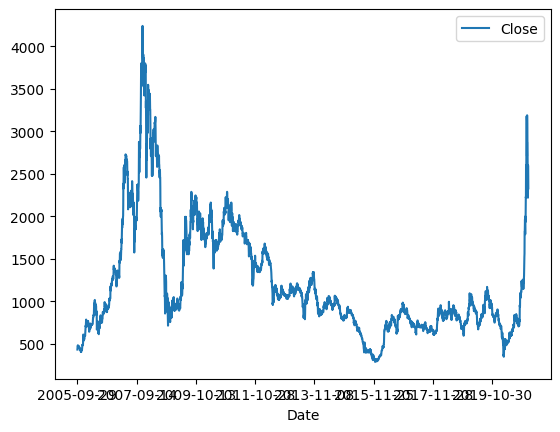

In [ ]:
# Exploratory data
df.plot(x='Date', y='Close')
plt.show()

In [ ]:
# Preprocessing the time series data
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
selected_columns = ['Close']
df_selected = df[selected_columns].copy()
df_selected['Close'] = df_selected['Close'].astype(float)

scaler = MinMaxScaler()
df_selected['Close'] = scaler.fit_transform(df_selected[['Close']])

In [ ]:
# Window & Horizon size
window_size = 5
horizon = 1

# Input & Output
def create_dataset(dataset, window_size, horizon):
    X, y = [], []
    for i in range(len(dataset) - window_size - horizon + 1):
        a = dataset[i:(i + window_size), 0]
        X.append(a)
        y.append(dataset[i + window_size : i + window_size + horizon, 0])
    return np.array(X), np.array(y)

# b)  Separate data into train, validation and test (80:10:10)

In [ ]:
# Split the data into train, validation, and test sets
train_size = int(len(df_selected) * 0.8)
val_size = int(len(df_selected) * 0.1)
test_size = len(df_selected) - train_size - val_size

train_data = df_selected[:train_size]
val_data = df_selected[train_size:train_size+val_size]
test_data = df_selected[train_size+val_size:]

print("Training set shape:", train_data.shape)
print("Validation set shape:", val_data.shape)
print("Testing set shape:", test_data.shape)

Training set shape: (3045, 1)
Validation set shape: (380, 1)
Testing set shape: (382, 1)


In [ ]:
X_train, y_train = create_dataset(train_data.values, window_size, horizon)
X_val, y_val = create_dataset(val_data.values, window_size, horizon)
X_test, y_test = create_dataset(test_data.values, window_size, horizon)

# Reshape the data
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

#c)  Create base architecture based on Table 1

In [ ]:
# RNN model
model = Sequential()
model.add(SimpleRNN(64, input_shape=(window_size, 1), activation="relu", return_sequences=False))
model.add(Dense(horizon))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (None, 64)                4224      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4289 (16.75 KB)
Trainable params: 4289 (16.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/20
95/95 [==============================] - 3s 12ms/step - loss: 0.0025 - mean_absolute_error: 0.0270 - val_loss: 5.0586e-05 - val_mean_absolute_error: 0.0053
Epoch 2/20
95/95 [==============================] - 1s 6ms/step - loss: 2.5960e-04 - mean_absolute_error: 0.0097 - val_loss: 4.6039e-05 - val_mean_absolute_error: 0.0051
Epoch 3/20
95/95 [==============================] - 1s 10ms/step - loss: 2.2758e-04 - mean_absolute_error: 0.0090 - val_loss: 4.0939e-05 - val_mean_absolute_error: 0.0047
Epoch 4/20
95/95 [==============================] - 1s 9ms/step - loss: 2.2771e-04 - mean_absolute_error: 0.0091 - val_loss: 5.7440e-05 - val_mean_absolute_error: 0.0061
Epoch 5/20
95/95 [==============================] - 1s 12ms/step - loss: 2.0729e-04 - mean_absolute_error: 0.0085 - val_loss: 3.7366e-05 - val_mean_absolute_error: 0.0045
Epoch 6/20
95/95 [==============================] - 1s 11ms/step - loss: 2.1208e-04 - mean_absolute_error: 0.0089 - val_loss: 4.3914e-05 - val_mean_abs

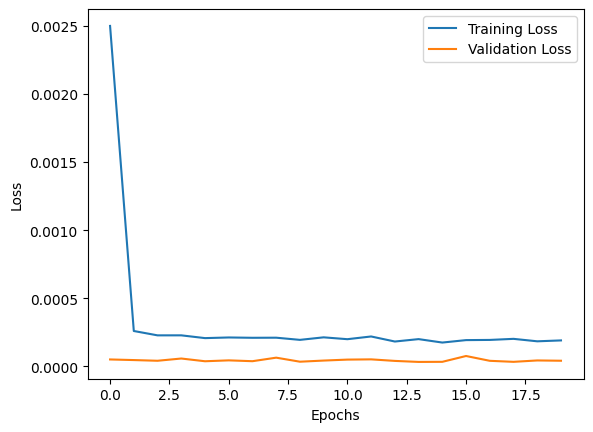

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# d) Adding Sequential Self-Attention Mechanism and explain how the sequential self-attention mechanism works

In [ ]:
# RNN model with Seq Self-Attention
model_RNN_Seq = Sequential()
model_RNN_Seq.add(SimpleRNN(64, input_shape=(window_size, 1), activation="relu", return_sequences=True))
model_RNN_Seq.add(SeqSelfAttention(attention_activation='softmax'))
model_RNN_Seq.add(Flatten())
model_RNN_Seq.add(Dense(horizon))

model_RNN_Seq.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

model_RNN_Seq.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_8 (SimpleRNN)    (None, 5, 64)             4224      
                                                                 
 seq_self_attention_5 (SeqS  (None, 5, 64)             4161      
 elfAttention)                                                   
                                                                 
 flatten_5 (Flatten)         (None, 320)               0         
                                                                 
 dense_8 (Dense)             (None, 1)                 321       
                                                                 
Total params: 8706 (34.01 KB)
Trainable params: 8706 (34.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history2 = model_RNN_Seq.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/20
95/95 [==============================] - 1s 15ms/step - loss: 2.1123e-04 - mean_absolute_error: 0.0092 - val_loss: 4.3422e-05 - val_mean_absolute_error: 0.0048
Epoch 2/20
95/95 [==============================] - 1s 6ms/step - loss: 1.9637e-04 - mean_absolute_error: 0.0085 - val_loss: 9.0989e-05 - val_mean_absolute_error: 0.0078
Epoch 3/20
95/95 [==============================] - 1s 5ms/step - loss: 1.9385e-04 - mean_absolute_error: 0.0085 - val_loss: 4.2199e-05 - val_mean_absolute_error: 0.0048
Epoch 4/20
95/95 [==============================] - 1s 5ms/step - loss: 1.9291e-04 - mean_absolute_error: 0.0085 - val_loss: 1.0614e-04 - val_mean_absolute_error: 0.0087
Epoch 5/20
95/95 [==============================] - 1s 5ms/step - loss: 2.0799e-04 - mean_absolute_error: 0.0091 - val_loss: 4.3998e-05 - val_mean_absolute_error: 0.0049
Epoch 6/20
95/95 [==============================] - 1s 5ms/step - loss: 1.8631e-04 - mean_absolute_error: 0.0084 - val_loss: 5.3152e-05 - val_mean_ab

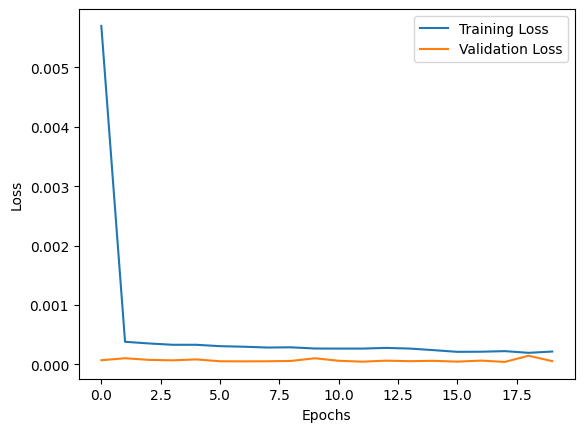

In [ ]:
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Seq Self-Attention ditambahkan ke model RNN untuk melengkapi kekurangan dari SimpleRNN, layer ini memungkinkan model untuk fokus pada hubungan antara titik waktu tertentu dalam rangkaian waktu dan menangkap pola-pola yang penting untuk tugas analisis atau prediksi. Untuk setiap langkah waktu, mekanisme Self-Attention menghitung bobot untuk semua langkah waktu lainnya, termasuk dirinya sendiri. Aktivasi 'softmax' digunakan untuk mengubah skor mentah menjadi nilai probabilitas, memastikan bahwa bobotnya berjumlah 1. Urutan asli kemudian dikalikan per elemen dengan bobot yang telah dihitung, dan nilai yang dihasilkan dijumlahkan. Proses ini menciptakan jumlah tertimbang, di mana lebih banyak perhatian diberikan kepada item dengan bobot yang lebih tinggi. Jumlah tertimbang dari item input kemudian digunakan untuk menghasilkan item output. Hal ini memungkinkan model untuk secara selektif memperhatikan bagian yang berbeda dari urutan input, meningkatkan kemampuannya untuk menangkap ketergantungan jangka panjang dan menghasilkan output yang akurat.<br><br>
**Referensi**: Chien, J. T., & Wang, C. W. (2019). Self attention in variational sequential learning for summarization. Proceedings of the Annual Conference of the International Speech Communication Association, INTERSPEECH, 2019-September, 1318–1322. https://doi.org/10.21437/Interspeech.2019-1548.

# e) Please proceed to evaluate the architecture outlined above on the test set, utilizing evaluation metrics that are congruent with the architecture specified in number 1c and 1d. Include a justification for the choice of these evaluation metrics. Subsequently, provide a detailed explanation of the results obtained.

In [ ]:
# Evaluation RNN model (1c)
mse_RNN, mae_RNN = model.evaluate(X_test, y_test)

print("\nEvaluation matrix results on RNN model")
print("MSE:", mse_RNN)
print("MAE:", mae_RNN)

12/12 [==============================] - 0s 3ms/step - loss: 2.6791e-04 - mean_absolute_error: 0.0083

Evaluation matrix results on RNN model
MSE: 0.00026791164418682456
MAE: 0.008326346054673195


In [ ]:
# Evaluation RNN model with Seq Self-Attention (1d)
mse_RNN_Seq, mae_RNN_Seq = model_RNN_Seq.evaluate(X_test, y_test)

print("\nEvaluation matrix results on RNN model with Seq Self-Attention")
print("MSE:", mse_RNN_Seq)
print("MAE:", mae_RNN_Seq)

12/12 [==============================] - 0s 3ms/step - loss: 2.6629e-04 - mean_absolute_error: 0.0083

Evaluation matrix results on RNN model with Seq Self-Attention
MSE: 0.0002662890765350312
MAE: 0.008266960270702839


MSE digunakan untuk mengukur seberapa baik model memprediksi nilai. MAE digunakan untuk mengukur kesalahan mutlak rata-rata antara prediksi dan nilai sebenarnya. MSE dan RMSE biasa digunakan untuk mengevaluasi kinerja model dalam memprediksi data time series. Semakin kecil nilai MSE dan RMSE, semakin baik performa model dalam memprediksi data. Oleh karena itu, model dengan nilai MSE dan RMSE yang paling kecil dianggap sebagai model yang paling baik performanya. <br><br>
Berdasarkan hasil diatas kedua model memiliki perbedaan yang sangat kecil dan sama-sama menunjukkan hasil yang bagus dengan nilai MSE dan MAE yang rendah. Ini menandakan bahwa kemampuan kedua model dalam memprediksi nilai sebenarnya sudah sangat baik. Namun, penggunaan Self-Attention pada model dapat menangkap pola-pola yang lebih kompleks dalam data time series. Sehingga, model ini lebih baik dari pada model RNN biasa.<br><br>

**Referensi**: Ridla, M. A., Azise, N., & Rahman, M. (2023). Perbandingan Model Time Series Forecasting Dalam Memprediksi Jumlah Kedatangan Wisatawan Dan Penumpang Airport. SIMKOM, 8(1), 1–14. https://doi.org/10.51717/simkom.v8i1.103.

# f) Create a line chart that displays a comparison between the prediction results from models 1d and 1c, and the actual values.

In [ ]:
# Predictions RNN model (1c)
y_pred_RNN = model.predict(X_test)

# Predictions RNN model with Seq Self-Attention (1d)
y_pred_RNN_Seq = model_RNN_Seq.predict(X_test)

12/12 [==============================] - 0s 3ms/step


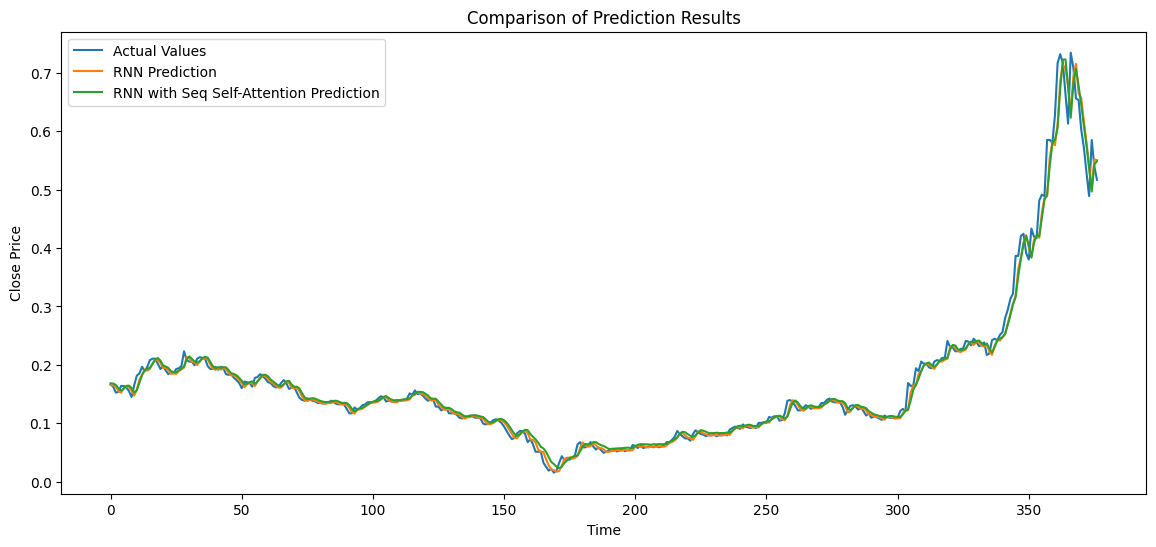

In [ ]:
# Plot predictions RNN model (1c)
plt.figure(figsize=(14, 6))
plt.plot(y_test, label='Actual Values')
plt.plot(y_pred_RNN, label='RNN Prediction')

# Plot predictions RNN model with Seq Self-Attention (1d)
plt.plot(y_pred_RNN_Seq, label='RNN with Seq Self-Attention Prediction')

plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Comparison of Prediction Results')
plt.legend()
plt.show()

Berdasarkan hasil plot diatas dapat dilihat bahwa kedua model dapat memprediksi dengan sangat baik mengikuti actual value.